# RMSE and ACC plots for the CREDIT arXiv paper

In [1]:
import os
import sys
import yaml
import numpy as np
from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, os.path.realpath('../libs/'))
import graph_utils as gu

In [9]:
config_name = os.path.realpath('plot_config.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

In [4]:
# graph tools
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as patches

import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec

%matplotlib inline

## Figure settings

In [5]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = conf['figure']['keys']['dpi']
else:
    dpi_ = 75

In [6]:
# colors
red0 = [1.0, 0.09803922, 0.09803922]
red1 = [1.0, 206/255, 204/255]
blue0 = [0.11372549, 0.0, 1.0]
blue1 = [218/255, 232/255, 1.0]
colors_main = [red0, blue0]
colors_sub = [red1, blue1]

line_keys = {}
line_keys['wxformer'] = {'linewidth': 3, 'linestyle': '--', 'color': colors_main[0], 'label': ''}
line_keys['IFS'] = {'linewidth': 3, 'linestyle': '-', 'color': colors_main[1], 'label': ''}

fill_keys = {}
fill_keys['wxformer'] = {'facecolor': colors_sub[0], 'alpha': 0.75, 'zorder': 1}
fill_keys['IFS'] = {'facecolor': colors_sub[1], 'alpha': 0.75, 'zorder': 1}

LEADs = np.arange(6, 240+6, 6)
LEAD_ticks = np.arange(0, 240+6, 6)[::8]

In [7]:
model_names = ['wxformer', 'IFS']
varnames_plot = ['U500', 'V500', 'T500', 'Q500', 'Z500', 't2m']
var_scales = [1.0, 1.0, 1.0, 1e4, 1e-2, 1]
var_scale_strs = ['1', '1', '1', '1E-4', '1E2', '1']

titles = ['(a) 500 hPa u-wind', 
          '(b) 500 hPa v-wind', 
          '(c) 500 hPa air temperature', 
          '(d) 500 hPa specific humidity', 
          '(e) 500 hPa geopotential height', 
          '(f) 2-m temperature']

legned_labels = ['Wxformer hourly forecasts', 'IFS 6 hourly forecasts']  
legned_labels_fill = ['95-th confidence intervals', '95-th confidence intervals']

## 2018-2020 verif

In [10]:
PLOT_data = np.load(conf['data']['save_loc'] + 'scores_CREDIT_arXiv_2024_LARGE.npy', allow_pickle=True)[()]

### Check IFS results

```python
for varname in ['SP','t2m','V500','U500','T500','Z500','Q500']:
    print(PLOT_data['RMSE_IFS_{}_mean'.format(varname)][:])

[306.38228339 307.78753986 308.07827469 309.86964319 310.96060518
 313.31197077 315.482972   318.77685308 321.99557365 326.78187574
 331.62410868 338.25182113 345.22253979 354.11009873 363.41296884
 374.84955669 386.63733396 400.69584564 415.07944281 431.43682248
 447.87767352 466.02554638 484.0137185  503.49077523 522.51246007
 542.8138834  562.50156851 583.04482707 602.74584468 622.8074549
 641.84386995 660.96967957 679.06413942 696.94439443 713.65768478
 730.00225888 745.37017524 760.53317225 774.74328865 788.55545833]
[0.96995233 1.01562351 0.99229647 1.05873614 1.05275033 1.12157127
 1.1089428  1.17370751 1.17483758 1.24113302 1.24327324 1.30774825
 1.32229841 1.39088248 1.40942509 1.47837285 1.50839326 1.58212406
 1.61713579 1.69147417 1.73529403 1.81247658 1.85931882 1.93560854
 1.98789434 2.06291665 2.1132544  2.18580951 2.24047221 2.31044174
 2.3611805  2.42642448 2.47735626 2.5389486  2.58527024 2.64042641
 2.68454568 2.73531032 2.7756501  2.82153666]
[1.42214619 1.60080628 1.67686255 1.89068599 2.00302067 2.23415617
 2.37208675 2.61393499 2.77476343 3.02581278 3.20726901 3.46487522
 3.66276422 3.92783467 4.14057585 4.41144194 4.63761839 4.9135893
 5.15141215 5.43167308 5.67720617 5.95692594 6.20193212 6.47471105
 6.71442726 6.97971054 7.21462087 7.47168392 7.69593845 7.936204
 8.14641536 8.374204   8.56994249 8.77217464 8.94631912 9.13244969
 9.28755335 9.45334773 9.58964087 9.74078445]
[1.43819685 1.61307797 1.68053711 1.89026492 1.99516022 2.22678324
 2.36105743 2.60158937 2.75606597 3.00395862 3.17622922 3.4307918
 3.61680049 3.87616882 4.07395856 4.33701363 4.54337856 4.80731584
 5.02280628 5.28846262 5.5066333  5.7690742  5.98846586 6.24618277
 6.46120859 6.71374547 6.92495766 7.16753371 7.37104117 7.60246825
 7.79417701 8.01402117 8.19335844 8.39713418 8.56097282 8.74661392
 8.89378145 9.06338858 9.19497162 9.34912508]
[0.39802086 0.4531902  0.47227685 0.53510932 0.56563061 0.63611536
 0.67599475 0.75109144 0.8001235  0.88017821 0.93883176 1.02331328
 1.09072913 1.17993749 1.2547964  1.34816291 1.43000158 1.52700378
 1.61393331 1.7139958  1.80614312 1.90733071 2.00148357 2.10241734
 2.19759973 2.29792038 2.39268542 2.48915408 2.58015953 2.6715443
 2.75879348 2.8460011  2.92911764 3.01084243 3.08761864 3.16126423
 3.23004897 3.29514882 3.35654586 3.41543291]
[ 27.3492933   37.90900426  38.69634317  49.64501035  53.64367122
  66.45302195  73.6418214   87.50177881  96.85686871 113.01332124
 125.17283489 143.43447442 158.55561497 178.89523518 196.46030011
 219.16940807 239.13924744 263.75054419 286.16541676 312.55413508
 336.60491022 364.09497062 389.35349895 417.48366991 443.40746717
 471.86860313 498.07376224 526.4486094  552.37445636 579.87529333
 605.00875605 631.42488295 655.23814653 679.85706379 701.82457609
 724.36754643 744.35555971 765.2555663  783.82090661 803.16686498]
[0.00031882 0.00035739 0.00037933 0.00041839 0.00043778 0.00047253
 0.00048923 0.00051916 0.00053403 0.00056141 0.00057575 0.0006013
 0.0006148  0.00063882 0.00065178 0.00067438 0.00068712 0.00070883
 0.00072134 0.00074196 0.00075421 0.00077385 0.00078534 0.00080398
 0.00081489 0.00083295 0.00084358 0.00086046 0.00087055 0.00088673
 0.00089596 0.00091112 0.00091952 0.00093366 0.00094137 0.00095464
 0.00096146 0.00097383 0.00097992 0.00099156]
```

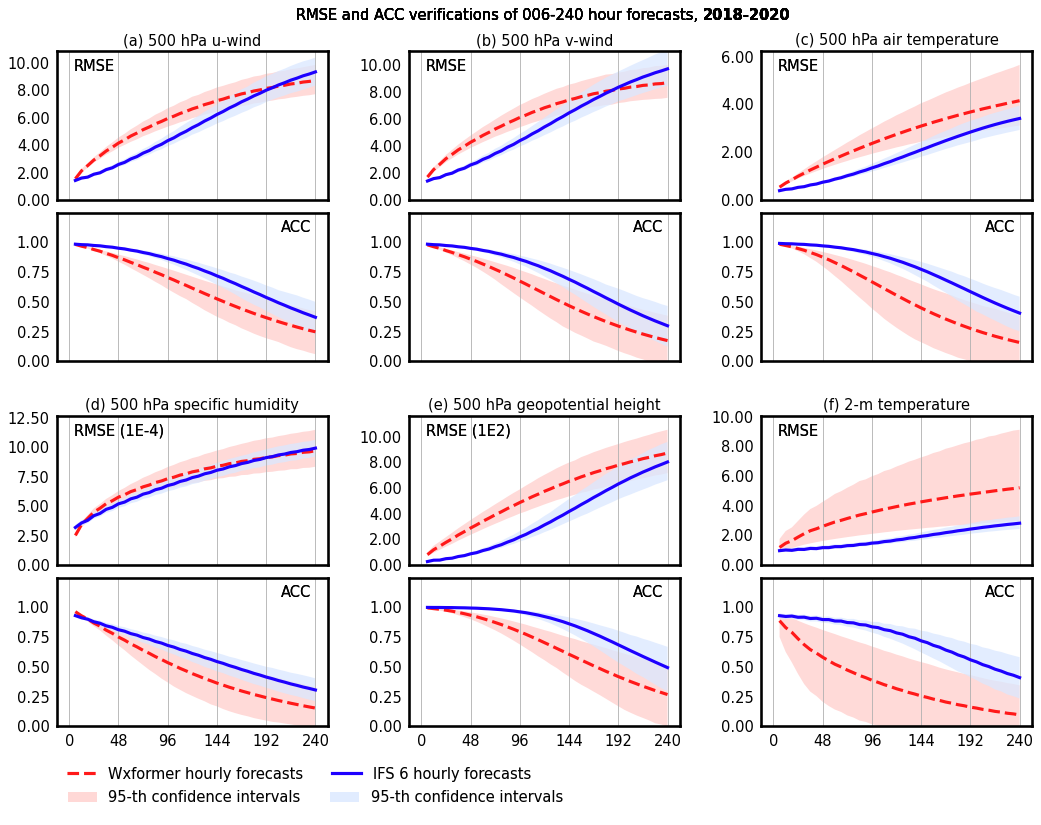

In [9]:
fig = plt.figure(figsize=(13, 9), dpi=dpi_)
gs = gridspec.GridSpec(5, 5, height_ratios=[1, 1, 0.2, 1, 1], width_ratios=[1, 0.3, 1, 0.3, 1])

handles = []

ind_x = [0, 1, 3, 4]
ind_y = [0, 2, 4]

#AX = []
AX = np.zeros((4, 3)).tolist()
AX_flat = []
for ix, ix_gs in enumerate(ind_x):
    for iy, iy_gs in enumerate(ind_y):
        AX[ix][iy] = plt.subplot(gs[ix_gs, iy_gs])
        AX_flat.append(plt.subplot(gs[ix_gs, iy_gs]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0.1, wspace=0.0)

for ax in AX_flat:
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(labelleft=True)
    ax.set_xticks(LEAD_ticks)
    ax.set_xlim([LEAD_ticks[0]-12, LEAD_ticks[-1]+12])
    ax.xaxis.grid(False)
    ax.grid(':', axis='x')
    #ax.grid(':', axis='y')

for iy in range(3):
    AX[-1][iy].tick_params(labelbottom=True)
    AX[-1][iy].set_xticklabels(LEAD_ticks)

# ACC y-axis
for ix in [1, 3]:
    for iy in range(3):
        AX[ix][iy].set_ylim([0.0, 1.25])
        AX[ix][iy].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])

# RMSE y-axis
for ix in [0, 2]:
    for iy in range(3):
        AX[ix][iy].yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
        #AX[ix][iy].ticklabel_format(axis='y', scilimits=[0, 0])
        AX[ix][iy].locator_params(axis='y', nbins=6)
        
        
for iy, var in enumerate(varnames_plot):
    for i_model, model_name in enumerate(model_names):

        # ====================================== #
        # panel indexing
        iy_ax = iy
        ix_ax = 0 # select top 3 or bottom 3
        if iy > 2:
            iy_ax = iy_ax - 3
            ix_ax = 2
            
        # --------------------------------------------------------------------------- #
        # RMSE
        
        f = var_scales[iy] # get the scale to plot
        
        AX[0+ix_ax][iy_ax].plot(LEADs, 
                                f*PLOT_data['RMSE_{}_{}_mean'.format(model_name, var)], 
                                **line_keys[model_name])

        # # 95th CIs
        AX[0+ix_ax][iy_ax].fill_between(LEADs, 
                                        f*PLOT_data['RMSE_{}_{}_95p'.format(model_name, var)],
                                        f*PLOT_data['RMSE_{}_{}_05p'.format(model_name, var)],
                                        **fill_keys[model_name])
        
        if f == 1:
            AX[0+ix_ax][iy_ax].text(0.0625, 0.95, 'RMSE', ha='left', va='top', 
                                    fontsize=14, transform=AX[0+ix_ax][iy_ax].transAxes)
        else:
            AX[0+ix_ax][iy_ax].text(0.0625, 0.95, 'RMSE ({})'.format(var_scale_strs[iy]), ha='left', va='top', 
                                    fontsize=14, transform=AX[0+ix_ax][iy_ax].transAxes)
        
        # # set ylim here to match the max RMSE vals
        if i_model == 0:
            AX[0+ix_ax][iy_ax].set_ylim([0, 1.1*np.max(f*PLOT_data['RMSE_{}_{}_95p'.format(model_name, var)])])

        # --------------------------------------------------------------------------- #
        # ACC
        AX[1+ix_ax][iy_ax].plot(LEADs, 
                                PLOT_data['ACC_{}_{}_mean'.format(model_name, var)], 
                                **line_keys[model_name])

        AX[1+ix_ax][iy_ax].fill_between(LEADs, 
                                        PLOT_data['ACC_{}_{}_95p'.format(model_name, var)],
                                        PLOT_data['ACC_{}_{}_05p'.format(model_name, var)],
                                        **fill_keys[model_name])
        
        AX[1+ix_ax][iy_ax].text(0.9375, 0.95, 'ACC', ha='right', va='top', 
                                fontsize=14, transform=AX[1+ix_ax][iy_ax].transAxes)

        # title
        AX[0+ix_ax][iy_ax].set_title(titles[iy], fontsize=14)

    handle_legneds1 = []
    handle_legneds1.append(mlines.Line2D([], [], **line_keys['wxformer']))
    handle_legneds1.append(mlines.Line2D([], [], **line_keys['IFS']))
    
    ax_lg1 = fig.add_axes([0.0, -0.1, 0.5, 0.06])
    LG1 = ax_lg1.legend(handle_legneds1, legned_labels, 
                        bbox_to_anchor=(1, 1), ncol=2, prop={'size':14})
    LG1 = gu.lg_box(LG1)


    handle_legneds2 = []
    handle_legneds2.append(patches.Patch(**fill_keys['wxformer']))
    handle_legneds2.append(patches.Patch(**fill_keys['IFS']))
    
    ax_lg2 = fig.add_axes([0.0, -0.135, 0.5325, 0.06])
    LG2 = ax_lg2.legend(handle_legneds2, legned_labels_fill, 
                        bbox_to_anchor=(1, 1), ncol=2, prop={'size':14})
    LG2 = gu.lg_box(LG2)
    
    ax_title1 = fig.add_axes([0.0, 1.025, 1.0, 0.04])
    title_len = 0.51
    fontsize_list = [14,]*10
    fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
    handles += gu.string_partial_format(fig, ax_title1, 0.5*(1-title_len), 1.0, 'left', 'top', 
                                        ['RMSE and ACC verifications of 006-240 hour forecasts, ',
                                         '2018-2020',], 
                                        ['k', 'k'], 
                                        fontsize_list, fontweight_list)
    
    ax_lg1.set_axis_off()
    ax_lg2.set_axis_off()
    ax_title1.set_axis_off()

if need_publish:
    # Save figure
    fig.savefig(conf['figure']['save_loc']+'CREDIT_arXiv_fig1.png', format='png', **conf['figure']['keys'])

## Verification separate by years

In [10]:
PLOT_data = np.load(
    '/glade/derecho/scratch/ksha/CREDIT/verif/PLOT_data/scores_CREDIT_arXiv_2024_LARGE_by_year.npy', 
    allow_pickle=True)[()]

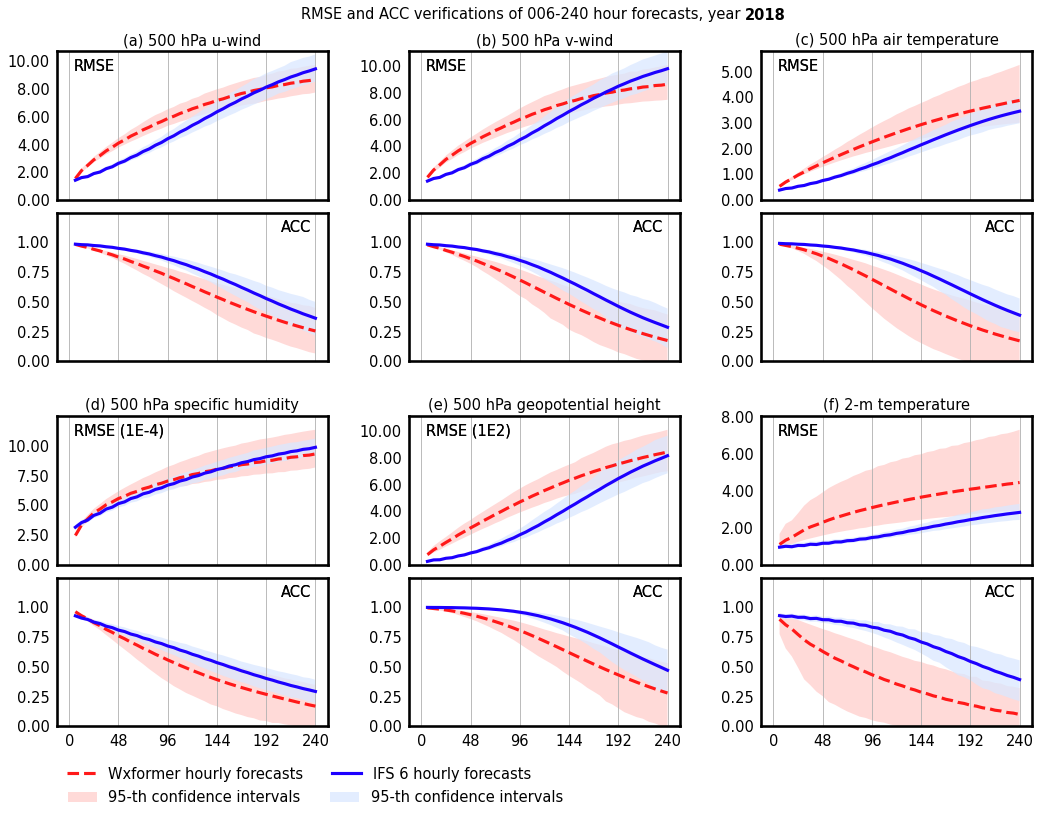

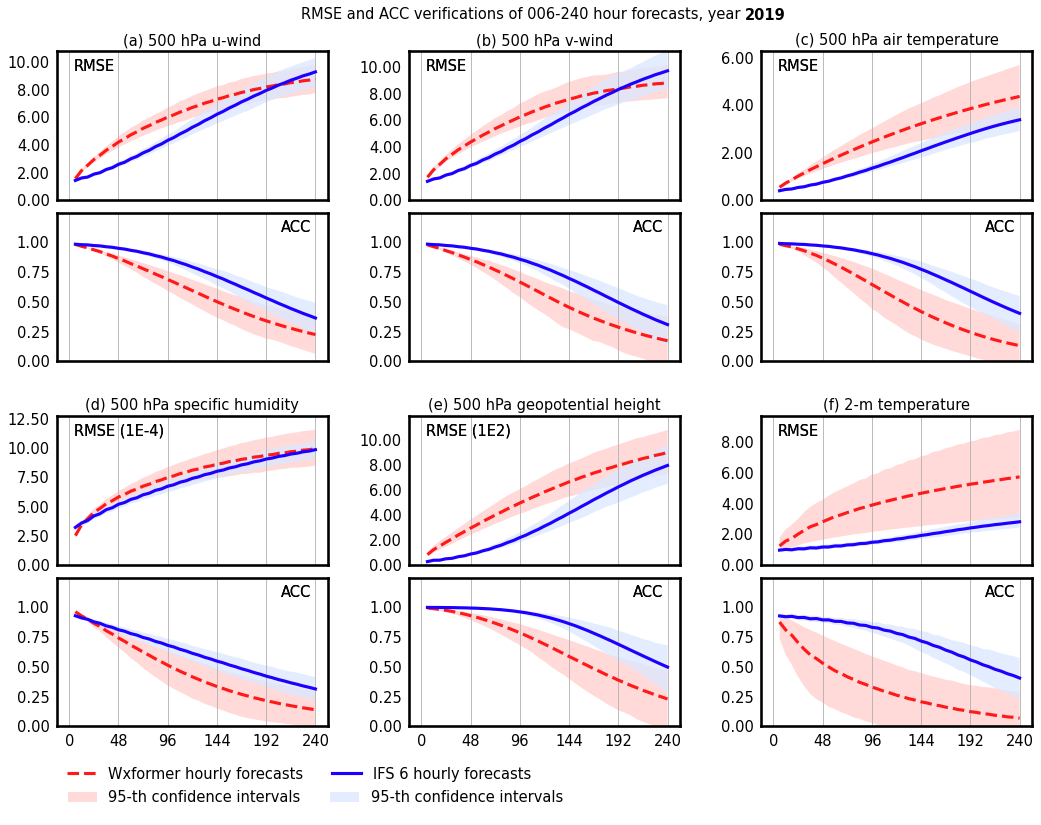

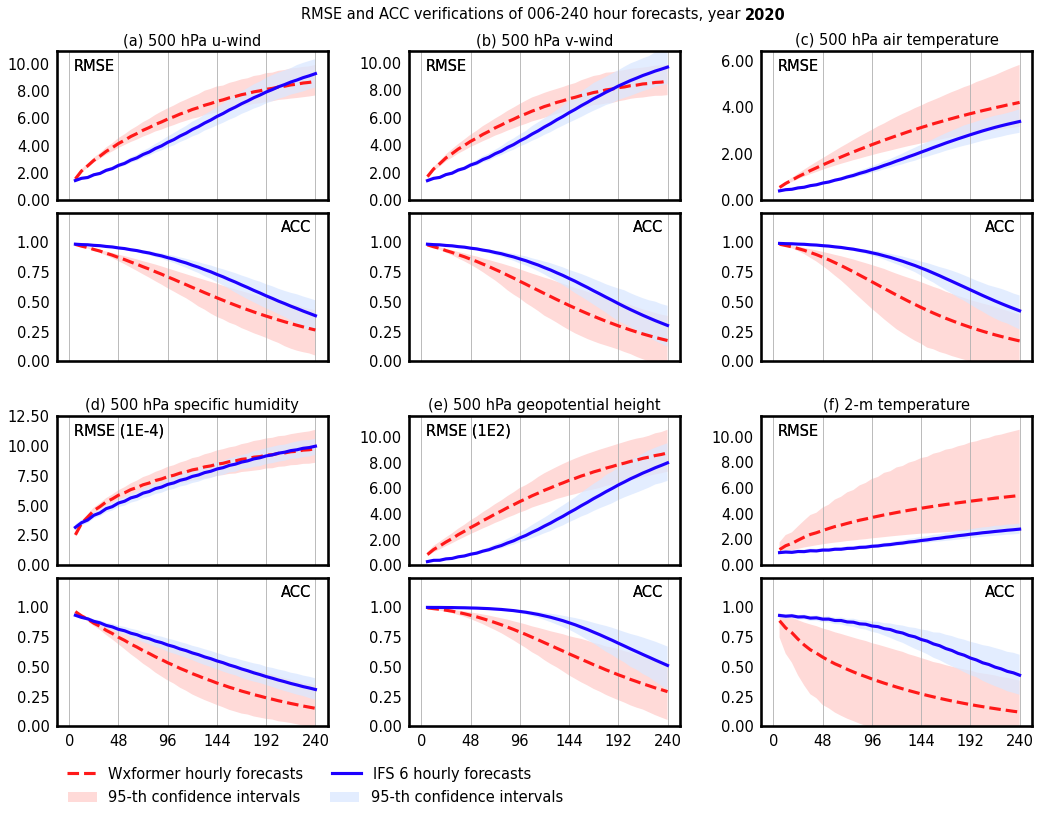

In [12]:
for i_year, year in enumerate([2018, 2019, 2020]):
    
    fig = plt.figure(figsize=(13, 9), dpi=dpi_)
    gs = gridspec.GridSpec(5, 5, height_ratios=[1, 1, 0.2, 1, 1], width_ratios=[1, 0.3, 1, 0.3, 1])
    
    handles = []
    
    ind_x = [0, 1, 3, 4]
    ind_y = [0, 2, 4]
    
    #AX = []
    AX = np.zeros((4, 3)).tolist()
    AX_flat = []
    for ix, ix_gs in enumerate(ind_x):
        for iy, iy_gs in enumerate(ind_y):
            AX[ix][iy] = plt.subplot(gs[ix_gs, iy_gs])
            AX_flat.append(plt.subplot(gs[ix_gs, iy_gs]))
    
    plt.subplots_adjust(0, 0, 1, 1, hspace=0.1, wspace=0.0)
    
    for ax in AX_flat:
        ax = gu.ax_decorate_box(ax)
        ax.tick_params(labelleft=True)
        ax.set_xticks(LEAD_ticks)
        ax.set_xlim([LEAD_ticks[0]-12, LEAD_ticks[-1]+12])
        ax.xaxis.grid(False)
        ax.grid(':', axis='x')
        #ax.grid(':', axis='y')
    
    for iy in range(3):
        AX[-1][iy].tick_params(labelbottom=True)
        AX[-1][iy].set_xticklabels(LEAD_ticks)
    
    # ACC y-axis
    for ix in [1, 3]:
        for iy in range(3):
            AX[ix][iy].set_ylim([0.0, 1.25])
            AX[ix][iy].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    
    # RMSE y-axis
    for ix in [0, 2]:
        for iy in range(3):
            AX[ix][iy].yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
            #AX[ix][iy].ticklabel_format(axis='y', scilimits=[0, 0])
            AX[ix][iy].locator_params(axis='y', nbins=6)
            
            
    for iy, var in enumerate(varnames_plot):
        for i_model, model_name in enumerate(model_names):
    
            # ====================================== #
            # panel indexing
            iy_ax = iy
            ix_ax = 0 # select top 3 or bottom 3
            if iy > 2:
                iy_ax = iy_ax - 3
                ix_ax = 2
                
            # --------------------------------------------------------------------------- #
            # RMSE
            
            f = var_scales[iy] # get the scale to plot
            
            AX[0+ix_ax][iy_ax].plot(LEADs, 
                                    f*PLOT_data['RMSE_{}_{}_{}_mean'.format(model_name, var, year)], 
                                    **line_keys[model_name])
    
            # # 95th CIs
            AX[0+ix_ax][iy_ax].fill_between(LEADs, 
                                            f*PLOT_data['RMSE_{}_{}_{}_95p'.format(model_name, var, year)],
                                            f*PLOT_data['RMSE_{}_{}_{}_05p'.format(model_name, var, year)],
                                            **fill_keys[model_name])
            
            if f == 1:
                AX[0+ix_ax][iy_ax].text(0.0625, 0.95, 'RMSE', ha='left', va='top', 
                                        fontsize=14, transform=AX[0+ix_ax][iy_ax].transAxes)
            else:
                AX[0+ix_ax][iy_ax].text(0.0625, 0.95, 'RMSE ({})'.format(var_scale_strs[iy]), ha='left', va='top', 
                                        fontsize=14, transform=AX[0+ix_ax][iy_ax].transAxes)
            
            # # set ylim here to match the max RMSE vals
            if i_model == 0:
                AX[0+ix_ax][iy_ax].set_ylim([0, 
                                             1.1*np.max(f*PLOT_data['RMSE_{}_{}_{}_95p'.format(
                                                 model_name, var, year)])])
    
            # --------------------------------------------------------------------------- #
            # ACC
            AX[1+ix_ax][iy_ax].plot(LEADs, 
                                    PLOT_data['ACC_{}_{}_{}_mean'.format(model_name, var, year)], 
                                    **line_keys[model_name])
    
            AX[1+ix_ax][iy_ax].fill_between(LEADs, 
                                            PLOT_data['ACC_{}_{}_{}_95p'.format(model_name, var, year)],
                                            PLOT_data['ACC_{}_{}_{}_05p'.format(model_name, var, year)],
                                            **fill_keys[model_name])
            
            AX[1+ix_ax][iy_ax].text(0.9375, 0.95, 'ACC', ha='right', va='top', 
                                    fontsize=14, transform=AX[1+ix_ax][iy_ax].transAxes)
    
            # title
            AX[0+ix_ax][iy_ax].set_title(titles[iy], fontsize=14)
    
    handle_legneds1 = []
    handle_legneds1.append(mlines.Line2D([], [], **line_keys['wxformer']))
    handle_legneds1.append(mlines.Line2D([], [], **line_keys['IFS']))
    
    ax_lg1 = fig.add_axes([0.0, -0.1, 0.5, 0.06])
    LG1 = ax_lg1.legend(handle_legneds1, legned_labels, 
                        bbox_to_anchor=(1, 1), ncol=2, prop={'size':14})
    LG1 = gu.lg_box(LG1)


    handle_legneds2 = []
    handle_legneds2.append(patches.Patch(**fill_keys['wxformer']))
    handle_legneds2.append(patches.Patch(**fill_keys['IFS']))
    
    ax_lg2 = fig.add_axes([0.0, -0.135, 0.5325, 0.06])
    LG2 = ax_lg2.legend(handle_legneds2, legned_labels_fill, 
                        bbox_to_anchor=(1, 1), ncol=2, prop={'size':14})
    LG2 = gu.lg_box(LG2)
    
    ax_title1 = fig.add_axes([0.0, 1.025, 1.0, 0.04])
    title_len = 0.5
    fontsize_list = [14,]*10
    fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
    handles += gu.string_partial_format(fig, ax_title1, 0.5*(1-title_len), 1.0, 'left', 'top', 
                                        ['RMSE and ACC verifications of 006-240 hour forecasts, year ',
                                         '{}'.format(year),], 
                                        ['k', 'k'], 
                                        fontsize_list, fontweight_list)
    
    ax_lg1.set_axis_off()
    ax_lg2.set_axis_off()
    ax_title1.set_axis_off()
    
    if need_publish:
        # Save figure
        fig.savefig(conf['figure']['save_loc']+'CREDIT_arXiv_yearly_fig{}.png'.format(i_year), 
                    format='png', **conf['figure']['keys'])